In [109]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam



In [110]:
print(tf.config.list_physical_devices('GPU'))

[]


In [96]:
BTCcsv = pd.read_csv('data/BTC.csv')
BTCdata = np.array(BTCcsv).astype(float)
xtrain = np.array(BTCdata[:1600,0:7])
ytrain = np.array(BTCdata[32:1600,7])
xtest = np.array(BTCdata[1568:1699,0:7])
ytest = np.array(BTCdata[1600:1699,7])



In [97]:
print(xtraincontext.shape)

(1568, 224)


In [103]:
xtraincontext = []
for i in range(0,len(xtrain)-32):
    newrow = np.array([])
    for j in range(i,i+32):
        newrow = np.append(newrow, xtrain[j])
    xtraincontext.append(newrow)  
xtraincontext = np.array(xtraincontext)

xtestcontext = []
for i in range(0,len(xtest)-32):
    newrow = np.array([])
    for j in range(i,i+32):
        newrow = np.append(newrow, xtest[j])
    xtestcontext.append(newrow)  
xtestcontext = np.array(xtestcontext)

dataset = keras.preprocessing.timeseries_dataset_from_array(xtrain, ytrain, sequence_length=32, batch_size = 1)
testset = keras.preprocessing.timeseries_dataset_from_array(xtest, ytest, sequence_length=32, batch_size = 1)

In [104]:
model = keras.models.Sequential()

model.add(keras.layers.Conv1D(32,7,7,activation='relu'))
#Maybe Yeet
model.add(keras.layers.Dense(16, activation='relu'))

model.add(keras.layers.Dense(1, activation='relu'))

In [105]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='MeanSquaredError', metrics =[keras.metrics.MeanAbsoluteError()])

In [106]:
loss_hist = model.fit(dataset, validation_data=testset, batch_size=1, epochs=150, shuffle=False)

Epoch 1/150
1568/1568 [==============================] - 2s 930us/step - loss: 0.0646 - mean_absolute_error: 0.1460 - val_loss: 0.0122 - val_mean_absolute_error: 0.0787
Epoch 2/150
1568/1568 [==============================] - 1s 785us/step - loss: 0.0152 - mean_absolute_error: 0.0816 - val_loss: 0.0085 - val_mean_absolute_error: 0.0669
Epoch 3/150
1568/1568 [==============================] - 1s 776us/step - loss: 0.0091 - mean_absolute_error: 0.0653 - val_loss: 0.0067 - val_mean_absolute_error: 0.0629
Epoch 4/150
1568/1568 [==============================] - 1s 760us/step - loss: 0.0067 - mean_absolute_error: 0.0565 - val_loss: 0.0066 - val_mean_absolute_error: 0.0640
Epoch 5/150
1568/1568 [==============================] - 1s 767us/step - loss: 0.0054 - mean_absolute_error: 0.0515 - val_loss: 0.0056 - val_mean_absolute_error: 0.0605
Epoch 6/150
1568/1568 [==============================] - 1s 767us/step - loss: 0.0046 - mean_absolute_error: 0.0478 - val_loss: 0.0062 - val_mean_absolute_

1568/1568 [==============================] - 1s 837us/step - loss: 0.0023 - mean_absolute_error: 0.0341 - val_loss: 0.0060 - val_mean_absolute_error: 0.0661
Epoch 50/150
1568/1568 [==============================] - 1s 833us/step - loss: 0.0023 - mean_absolute_error: 0.0340 - val_loss: 0.0060 - val_mean_absolute_error: 0.0659
Epoch 51/150
1568/1568 [==============================] - 1s 857us/step - loss: 0.0023 - mean_absolute_error: 0.0339 - val_loss: 0.0060 - val_mean_absolute_error: 0.0658
Epoch 52/150
1568/1568 [==============================] - 1s 829us/step - loss: 0.0023 - mean_absolute_error: 0.0340 - val_loss: 0.0060 - val_mean_absolute_error: 0.0659
Epoch 53/150
1568/1568 [==============================] - 1s 820us/step - loss: 0.0023 - mean_absolute_error: 0.0339 - val_loss: 0.0059 - val_mean_absolute_error: 0.0650
Epoch 54/150
1568/1568 [==============================] - 1s 805us/step - loss: 0.0023 - mean_absolute_error: 0.0339 - val_loss: 0.0058 - val_mean_absolute_error: 

1568/1568 [==============================] - 1s 803us/step - loss: 0.0022 - mean_absolute_error: 0.0327 - val_loss: 0.0041 - val_mean_absolute_error: 0.0521
Epoch 98/150
1568/1568 [==============================] - 1s 804us/step - loss: 0.0022 - mean_absolute_error: 0.0327 - val_loss: 0.0041 - val_mean_absolute_error: 0.0522
Epoch 99/150
1568/1568 [==============================] - 1s 867us/step - loss: 0.0022 - mean_absolute_error: 0.0327 - val_loss: 0.0041 - val_mean_absolute_error: 0.0524
Epoch 100/150
1568/1568 [==============================] - 1s 835us/step - loss: 0.0022 - mean_absolute_error: 0.0326 - val_loss: 0.0041 - val_mean_absolute_error: 0.0523
Epoch 101/150
1568/1568 [==============================] - 1s 796us/step - loss: 0.0022 - mean_absolute_error: 0.0326 - val_loss: 0.0041 - val_mean_absolute_error: 0.0521
Epoch 102/150
1568/1568 [==============================] - 1s 777us/step - loss: 0.0022 - mean_absolute_error: 0.0326 - val_loss: 0.0040 - val_mean_absolute_erro

1568/1568 [==============================] - 1s 778us/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0032 - val_mean_absolute_error: 0.0450
Epoch 146/150
1568/1568 [==============================] - 1s 776us/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0032 - val_mean_absolute_error: 0.0449
Epoch 147/150
1568/1568 [==============================] - 1s 776us/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0031 - val_mean_absolute_error: 0.0446
Epoch 148/150
1568/1568 [==============================] - 1s 775us/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0031 - val_mean_absolute_error: 0.0442
Epoch 149/150
1568/1568 [==============================] - 1s 804us/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0031 - val_mean_absolute_error: 0.0438
Epoch 150/150
1568/1568 [==============================] - 1s 791us/step - loss: 0.0021 - mean_absolute_error: 0.0320 - val_loss: 0.0030 - val_mean_absolute_er

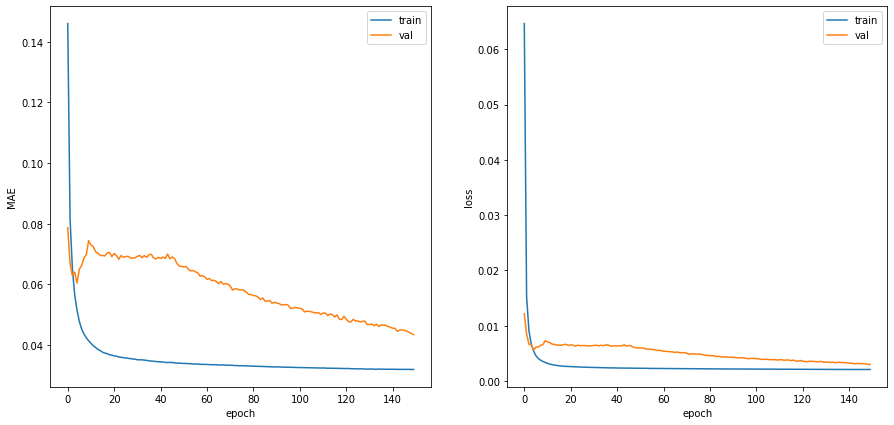

In [107]:
hist = loss_hist.history
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['mean_absolute_error'])
plt.plot(hist['val_mean_absolute_error'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()